<a href="https://colab.research.google.com/github/vcoelh/Project-Euler/blob/main/neurons_and_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [21]:
linear_layer = tf.keras.layers.Dense(units=1, activation= 'linear')

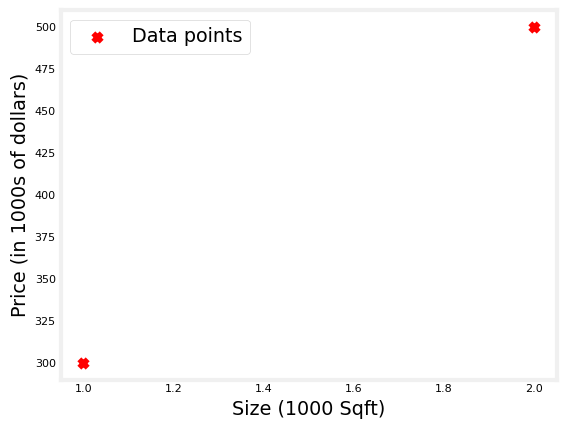

In [19]:
X_train = np.array([[1.0], [2.0]], dtype= np.float32)
y_train = np.array([[300.0], [500.0]], dtype= np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, y_train, marker='x', c= 'r', label="Data points")
ax.legend(fontsize ='xx-large')
ax.set_xlabel('Size (1000 Sqft)', fontsize = 'xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
plt.show()

criando um layer com o modelo de regressao linear 

In [22]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

pegando alguns weights

In [39]:
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [40]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)


tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


In [28]:
w, b = linear_layer.get_weights()
print(f'weight: {w} and bias: {b}')

weight: [[0.54]] and bias: [0.]


In [35]:
set_w = np.array([[200]])
set_b = np.array([100])
# set_weights takes a list of array

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())


[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [41]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)


tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[200.]]


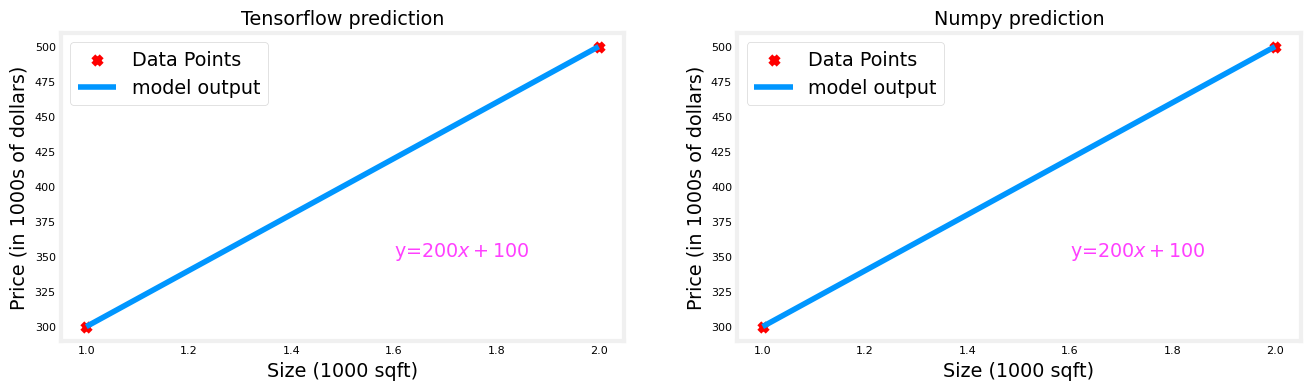

In [42]:
prediction_tf = linear_layer(X_train)
prediction_np = X_train.dot(set_w) + set_b

plt_linear(X_train, y_train, prediction_tf, prediction_np)

**Sigmoid**

In [48]:
X_train = np.array([0., 1., 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype= np.float32).reshape(-1,1)

print(f'X_train: {X_train},\ny_train: {y_train} ')

X_train: [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]],
y_train: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 


NameError: ignored

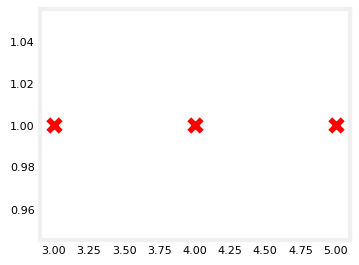

In [53]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [54]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim = 1, activation = 'sigmoid', name = 'L1')
    ]
) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [58]:
logistic_layer = model.get_layer('L1')

w , b = logistic_layer.get_weights()
print(f' w: {w}, b: {b}') 

print(f'{w.shape}, {b.shape}')

 w: [[0.15]], b: [0.]
(1, 1), (1,)


In [59]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])

print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [60]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

alin = sigmoidnp(np.dot(X_train[0], set_w) + set_b)
print(alin)

1/1 [==============================] - 0s 141ms/step
[[0.01]]
[0.01]


1/1 [==============================] - 0s 18ms/step


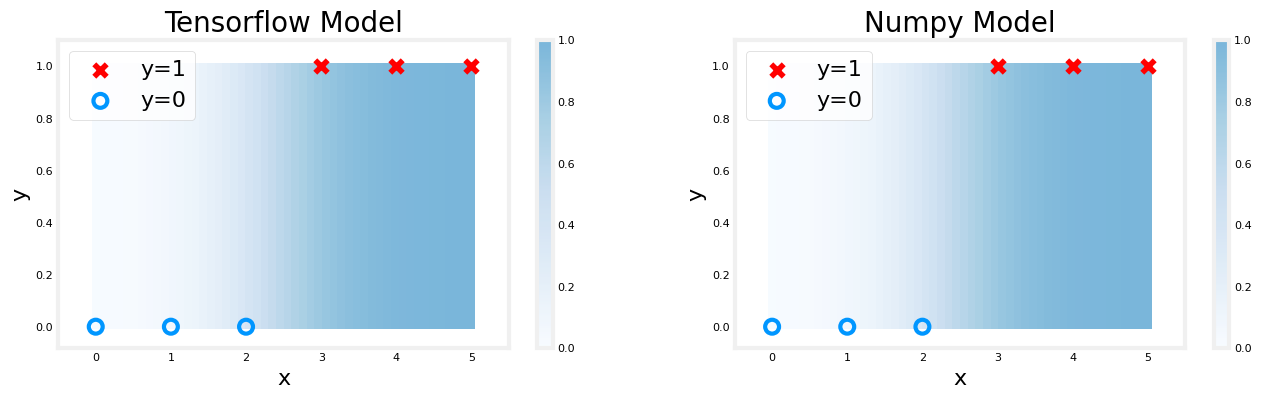

In [62]:
plt_logistic(X_train, y_train, model, set_w, set_b, pos, neg)